# Table of Contents
 <p><div class="lev1 toc-item"><a href="#MICS-Whales" data-toc-modified-id="MICS-Whales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MICS Whales</a></div><div class="lev2 toc-item"><a href="#Import-statements" data-toc-modified-id="Import-statements-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import statements</a></div><div class="lev2 toc-item"><a href="#Ideas" data-toc-modified-id="Ideas-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ideas</a></div><div class="lev3 toc-item"><a href="#Estimating-Birth-rate,-given-that-we-know-a-whale-gave-birth-at-time-t=i" data-toc-modified-id="Estimating-Birth-rate,-given-that-we-know-a-whale-gave-birth-at-time-t=i-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Estimating Birth rate, given that we know a whale gave birth at time t=i</a></div><div class="lev3 toc-item"><a href="#Comparing-old-data-with-the-new-data." data-toc-modified-id="Comparing-old-data-with-the-new-data.-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Comparing old data with the new data.</a></div><div class="lev2 toc-item"><a href="#Import-statement" data-toc-modified-id="Import-statement-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Import statement</a></div><div class="lev2 toc-item"><a href="#Log-Progress" data-toc-modified-id="Log-Progress-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Log Progress</a></div><div class="lev2 toc-item"><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Data Cleaning</a></div><div class="lev3 toc-item"><a href="#Ensure-columns-are-in-string-format" data-toc-modified-id="Ensure-columns-are-in-string-format-151"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Ensure columns are in string format</a></div><div class="lev3 toc-item"><a href="#column_years" data-toc-modified-id="column_years-152"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>column_years</a></div><div class="lev3 toc-item"><a href="#Focus-only-on-raw-unprocessed-data" data-toc-modified-id="Focus-only-on-raw-unprocessed-data-153"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Focus only on raw unprocessed data</a></div><div class="lev3 toc-item"><a href="#Focus-on-part-of-the-data-that-was-sighted-to-have-at-least-one-birth" data-toc-modified-id="Focus-on-part-of-the-data-that-was-sighted-to-have-at-least-one-birth-154"><span class="toc-item-num">1.5.4&nbsp;&nbsp;</span>Focus on part of the data that was sighted to have at least one birth</a></div><div class="lev3 toc-item"><a href="#For-each-row,-find-the-earliest-instance-of-2.0" data-toc-modified-id="For-each-row,-find-the-earliest-instance-of-2.0-155"><span class="toc-item-num">1.5.5&nbsp;&nbsp;</span>For each row, find the earliest instance of 2.0</a></div><div class="lev2 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Modeling</a></div><div class="lev3 toc-item"><a href="#Generate-Data" data-toc-modified-id="Generate-Data-161"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Generate Data</a></div><div class="lev3 toc-item"><a href="#Plot-Data" data-toc-modified-id="Plot-Data-162"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Plot Data</a></div><div class="lev3 toc-item"><a href="#Error-Function" data-toc-modified-id="Error-Function-163"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Error Function</a></div><div class="lev3 toc-item"><a href="#Run-a-bunch-of-times-and-find-the-Average-Error" data-toc-modified-id="Run-a-bunch-of-times-and-find-the-Average-Error-164"><span class="toc-item-num">1.6.4&nbsp;&nbsp;</span>Run a bunch of times and find the Average Error</a></div><div class="lev3 toc-item"><a href="#Grid-Search" data-toc-modified-id="Grid-Search-165"><span class="toc-item-num">1.6.5&nbsp;&nbsp;</span>Grid Search</a></div><div class="lev3 toc-item"><a href="#Graph-comparisons" data-toc-modified-id="Graph-comparisons-166"><span class="toc-item-num">1.6.6&nbsp;&nbsp;</span>Graph comparisons</a></div><div class="lev3 toc-item"><a href="#Avg.-Birth-Rate" data-toc-modified-id="Avg.-Birth-Rate-167"><span class="toc-item-num">1.6.7&nbsp;&nbsp;</span>Avg. Birth Rate</a></div>

# MICS Whales

## Import statements

## Ideas

Observations about the data set.
* Some individuals are more represented since they're older and had more of a longer time to be sexually active. Thus, our estimates might be biased towards older whales.

* We are missing data. We don't know what happened with a whale when it's been missing for a while. Did it die? Or was it alive, and if so, did it give birth?

* Back-to-back births seem implausible.

### Estimating Birth rate, given that we know a whale gave birth at time t=i
* Problem with "Years Since Previous Birth"
    * _YSPB_ is a noisy variable, since we don't always get the chance to see the whales. If we discard the scenarios where we don't see the whale, then _YSPB_ will be an overestimate of the true concept.
    
    * Idea: Assume a binomial (or negative binomial) distribution
        * it's discrete, and assumes that data is independent and identically distributed (i.i.d.), which isn't exactly always the case (e.g. birth at t=0 gives you a lot of information about birth at t=1. However, maybe it does happen but just very infrequently). 
            * We can just truncate birth at t=1 to never happen, and then we can normalize the other probabilities so they sum to 1.
        * Pick a p.
        * Randomly generate data from this distribution
        * Assess how good the fit is (using uncensored data).
        * Rank the best parameters.
            

        
    * If we're interested in making a statement about whales that should technically be able to reproduce (i.e. active), whatever value we get might be an over-estimate of the true value for active whales. Why? Selection bias. Maybe it's so bad out there that some whales who just matured enough (haven't reproduced) don't get to reproduce. 

### Comparing old data with the new data.
* Maybe individuals (which are more represented in both data sets) are less likely to reproduce when they hit a certain age. So age would be a common cause (confounding variable) of fecundity rate at earlier and later times.


## Import statement

In [296]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Log Progress

In [249]:
def log_progress(sequence, every=None, size=None, name='Items'):
    # from https://github.com/alexanderkuk/log-progress
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

## Data Cleaning

In [7]:
calving_data = pd.read_excel('./data/females_calving_2016 up to date.xlsx')
calving_data

,MICS,HWC numbers,80,81,82,83,84,85,86,87,...,08,09,10,11,12,13,14,15,16,Unnamed: 39
0,H002,3229,1.0,NaN,NaN,1.0,1,NaN,NaN,1.0,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,NaN
1,H004,1422,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H008,1417,NaN,NaN,2.0,1.0,1,2.0,NaN,NaN,...,1.0,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,2.000000,NaN
3,H009,1419,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,2.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,NaN
4,H035,2088,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,H042,1451,NaN,NaN,NaN,1.0,1,NaN,NaN,1.0,...,2.0,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000,NaN
6,H044,1424,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,...,1.0,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,H065,7002,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,H067,7014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,H102,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,...,1.0,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN


### Ensure columns are in string format

In [24]:
calving_data.columns = calving_data.columns.astype('str')
calving_data.columns

Index(['MICS', 'HWC numbers', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
       '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', 'Unnamed: 39'],
      dtype='object')

### column_years

In [17]:
def column_years():
    col_years = [str(i) for i in range(80,100)]
    
    for i in range(0,17):
        str_val = ''

        if len(str(i)) == 1:
            str_val = '0' + str(i)
        else:
            str_val = str(i)

        col_years.append(str_val)
        
    return col_years

In [18]:
column_years()

['80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16']

### Focus only on raw unprocessed data

In [31]:
unprocessed_data = calving_data[column_years()].loc[:114]
unprocessed_data

,80,81,82,83,84,85,86,87,88,89,...,07,08,09,10,11,12,13,14,15,16
0,1.0,NaN,NaN,1.0,1,NaN,NaN,1.0,1.0,2.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
1,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2.0,1.0,1,2.0,NaN,NaN,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,2.0
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,1.0,1,NaN,NaN,1.0,2.0,1.0,...,1.0,2.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,2.0
6,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0


In [69]:
no_nans = unprocessed_data.fillna(0.0)
no_nans

,80,81,82,83,84,85,86,87,88,89,...,07,08,09,10,11,12,13,14,15,16
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
1,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,...,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0
6,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


### Focus on part of the data that was sighted to have at least one birth

In [93]:
rows_with_observed_births = no_nans.loc[np.where((no_nans > 1).sum(axis=1) > 0)]
rows_with_observed_births

,80,81,82,83,84,85,86,87,88,89,...,07,08,09,10,11,12,13,14,15,16
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
1,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,...,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0
6,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,2.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0
12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### For each row, find the earliest instance of 2.0

In [105]:
def find_earliest_birth(x):
    for index, i in enumerate(x):
        if i == 2:
            return index
    
    return None

In [106]:
rows_with_observed_births.apply(find_earliest_birth, axis=1)

0       9
1       3
2       2
3      11
5       8
6      18
8      19
9      25
11     13
12     21
14      9
15     10
16     14
17     20
19     13
20     17
22     17
23     21
24     10
26     25
28     25
32     29
33     17
34     19
36     31
37     18
38     17
40     18
41     26
42     27
43     18
45     27
50     25
55     33
56     26
58     27
59     25
60     28
61     27
64     28
71     27
72     29
78     25
79     28
105    28
114    36
dtype: int64

## Modeling

### Generate Data

In [392]:
def generate_data(binomial_n=9, binomial_p=0.5, binomial_offset=False, df_data=None):
    num_rows, num_cols = df_data.shape
    # 1s represent female only
    time_data = np.ones((num_rows, num_cols))
    
    for row, col_with_first_birth in enumerate(df_data.apply(find_earliest_birth, axis=1)):
        tmp_col = col_with_first_birth
        
        time_data[row, tmp_col] = 2 # first birth

        while tmp_col < num_cols:
            tmp_next_birth = np.random.binomial(n=binomial_n, p=binomial_p) + tmp_col
            
            if binomial_offset:
                next_birth = tmp_next_birth + 2
            else:
                next_birth = tmp_next_birth
                
            if next_birth < num_cols:
                time_data[row, next_birth] = 2

            tmp_col = next_birth

    return time_data

### Plot Data

In [393]:
def generate_and_hide(**kwargs):
    fake_data = generate_data(df_data=rows_with_observed_births, **kwargs)
    fake_data[np.where(rows_with_observed_births.as_matrix() == 0)] = 0
    
    return fake_data


In [394]:
def plot_fake_data(**kwargs):
    fake_data = generate_and_hide(**kwargs)

    plt.figure(figsize=(8,8))
    sns.heatmap(fake_data)

### Error Function

In [395]:
def error(original, other):
    birth_counts_observed = (original == 2).sum(axis=1)
    birth_counts_projected = (other == 2).sum(axis=1)
    
    return (((birth_counts_observed - birth_counts_projected)**2)).sum().sum()

In [396]:
error(fake_data, rows_with_observed_births)

1409

### Run a bunch of times and find the Average Error



In [397]:
def simulate(**kwargs):
    total_error = 0
    num_times=100
    
    for i in range(num_times):
        fake_data = generate_data(
            **kwargs
        )
        fake_data[np.where(rows_with_observed_births.as_matrix() == 0)] = 0
        total_error += error(fake_data, rows_with_observed_births)
        
    return total_error / num_times

### Grid Search

In [398]:
def grid_search(
    binomial_offset=False, df_data=rows_with_observed_births
):
    errors = []
    n_values = list(range(8,10))
    p_values = np.linspace(0.01,1,100)
    for n,p in log_progress(itertools.product(n_values, p_values), every=1, size=len(n_values) * len(p_values)):
        errors.append({'n':n, 'p': p, 'error': simulate(
            binomial_n=n, 
            binomial_p=p, 
            binomial_offset=binomial_offset, 
            df_data=df_data
        )}) 
    return pd.DataFrame(errors).sort_values(by='error')

In [385]:
errors = grid_search()

In [386]:
pd.DataFrame(errors).sort_values(by='error')

,error,n,p
48,64.32,8,0.49
49,65.21,8,0.50
51,65.83,8,0.52
146,66.33,9,0.47
145,66.67,9,0.46
147,66.70,9,0.48
54,67.04,8,0.55
143,67.05,9,0.44
144,67.09,9,0.45
52,67.42,8,0.53


In [399]:
errors_with_offset = grid_search(binomial_offset=True)
errors_with_offset

,error,n,p
120,61.70,9,0.21
23,62.01,8,0.24
122,62.68,9,0.23
119,62.69,9,0.20
123,63.31,9,0.24
25,63.62,8,0.26
24,63.66,8,0.25
118,64.10,9,0.19
124,64.24,9,0.25
22,64.33,8,0.23


### Graph comparisons

Looks like $\text{Binomial}(n=9, p=0.45)$ is a good fit, compared to others. However, we could probably do better. We know that a reproductively active female doesn't reproduce the next year after just having given birth. We could probably fit with a function $1 + \text{Binomial}(n=i, p=j)$ so that this doesn't happen.

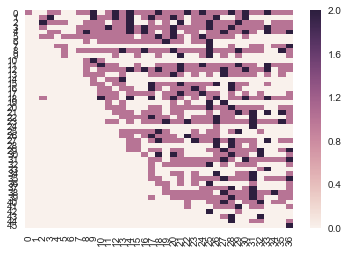

In [400]:
sns.heatmap(generate_and_hide(binomial_n=9, binomial_p=0.21, binomial_offset=1))

In [391]:
1 + 8*0.37

3.96

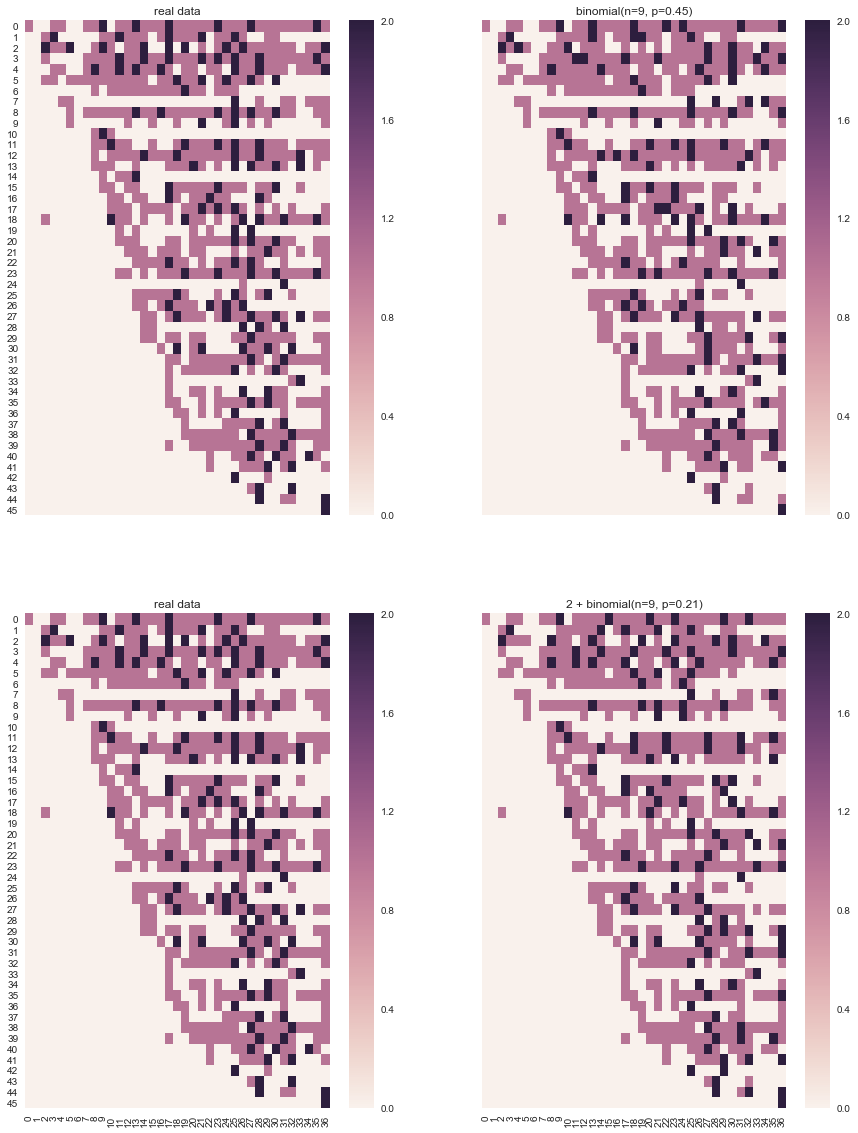

In [402]:

# plt.figure(figsize=(20,20))
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15,20))

ax[0,0].set_title('real data')
ax[0,0].set_ylabel('whale')
sns.heatmap(rows_with_observed_births.as_matrix(),ax=ax[0,0])

ax[1,0].set_title('real data')
ax[1,0].set_ylabel('whale')
sns.heatmap(rows_with_observed_births.as_matrix(),ax=ax[1,0])


ax[0,1].set_title('binomial(n=9, p=0.45)')
sns.heatmap(generate_and_hide(binomial_n=9, binomial_p=0.45),ax=ax[0,1])

ax[1,1].set_title('2 + binomial(n=9, p=0.21)')
sns.heatmap(generate_and_hide(binomial_n=9, binomial_p=0.21, binomial_offset=True),ax=ax[1,1])


### Avg. Birth Rate

In [403]:
# 2 is the offset, np is the average of binomial with parameters n & p
2 + 9*0.21

3.8899999999999997

In [410]:
# 95% CI

samples = 2 + np.random.binomial(n=9, p=0.21, size=10000)

In [411]:
samples

array([7, 6, 5, ..., 5, 7, 4])

In [417]:
print('CI is (', np.sort(samples)[250], ',', np.sort(samples)[10000-250], ')')

CI is ( 2 , 6 )
